#**Analyzing K-Pop Using Machine Learning**
#Part 3: Model Building

- Author: Jaemin Lee (aka. Import Data)

- [Import Data YouTube Channel](https://www.youtube.com/channel/UCYDacpfRrCX6_8oDDlzTgFw)

- [Dataset Link](https://github.com/importdata/kpop-analysis/blob/master/fully%20cleaned%20kpop%20data.csv)
- [Medium Blog](https://towardsdatascience.com/analyzing-k-pop-using-machine-learning-part-3-model-building-c19149964a22?source=friends_link&sk=bdc6d70ddd2b57bec5b29e3990bbb833)

# Import Basic Libraries

In [0]:
import pandas as pd
import numpy as np

# Import Data

In [0]:
df = pd.read_csv("/content/fully cleaned kpop data.csv")

In [0]:
df.columns

Index(['fav_grp', 'popl_by_co_yn', 'reason', 'yr_listened', 'gender_pref',
       'daily_music_hr', 'watch_MV_yn', 'daily_MV_hr', 'obsessed_yn',
       'news_medium', 'pursuit', 'time_cons_yn', 'life_chg', 'pos_eff',
       'yr_merch_spent', 'money_src', 'concert_yn', 'crazy_ev', 'age',
       'country', 'job', 'gender', 'num_gr_like', 'bts_vs_others'],
      dtype='object')

In [0]:
# subset relevant columns for model

df_model = df[['popl_by_co_yn', 'reason', 'yr_listened', 'gender_pref',
       'daily_music_hr', 'watch_MV_yn', 'daily_MV_hr', 'obsessed_yn',
       'news_medium', 'pursuit', 'time_cons_yn', 'life_chg', 'pos_eff',
       'yr_merch_spent', 'money_src', 'concert_yn', 'crazy_ev', 'age',
       'country', 'job', 'gender', 'num_gr_like', 'bts_vs_others']]

In [0]:
# get dummy data to convert categorical variable into dummy/indicator variables
df_dum = pd.get_dummies(df_model)
df_dum

,yr_listened,daily_music_hr,daily_MV_hr,yr_merch_spent,age,num_gr_like,popl_by_co_yn_i'm not sure,popl_by_co_yn_its gaining popularity,popl_by_co_yn_no,popl_by_co_yn_yes,reason_attractive idols,reason_many reasons,reason_other reason(s),reason_unique music style,gender_pref_both,gender_pref_female,gender_pref_it's about music,gender_pref_male,watch_MV_yn_no,watch_MV_yn_yes,obsessed_yn_no,obsessed_yn_not sure,obsessed_yn_yes,"news_medium_others (reddit, tumbler, or none)","news_medium_social media (twitter, instagram)",news_medium_youtube,pursuit_learn korean fashion/makeup,pursuit_learn music,pursuit_learn the culture,pursuit_none,pursuit_others (combination of the the four and visit korea),pursuit_pursue dancing,time_cons_yn_no,"time_cons_yn_others (sometimes, not sure)",time_cons_yn_yes,life_chg_made fun of,life_chg_none,"life_chg_others (combination of the negatives, small criticism)",life_chg_reduced amount of sleep,life_chg_reduced time of socialized with friends/family,pos_eff_both reduced stress and made friends,pos_eff_made friends,"pos_eff_others (don't know, no effect, learning new things)",pos_eff_reduced stress/anxiety/depression,money_src_borrowed,money_src_from parents,money_src_full-time job,"money_src_others (gift, scholarship, etc)",money_src_part-time job,"concert_yn_i want to, but the k-pop groups don't come to my city",concert_yn_no,concert_yn_yes,crazy_ev_didn't study or work,crazy_ev_nothing,"crazy_ev_others (combination of not studying/working and missing school/work, etc)",country_australia,country_canada,country_france,country_germany,country_latin america,country_other asian countries,country_other european countries,"country_others (south africa, new zealand, sweden, finland, turkey, caribbean)",country_uk,country_usa,job_full-time worker,job_student,job_unemployed,gender_female,gender_male,gender_transgender,bts_vs_others_bts,bts_vs_others_other(s)
0,1.5,5.0,2.5,75,18,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
1,3.5,3.0,2.5,50,18,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
2,4.0,3.0,2.5,75,18,2,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
3,3.5,5.0,3.5,75,24,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
4,3.5,5.0,2.5,150,18,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,3.5,5.0,3.5,0,18,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
236,4.0,3.0,2.5,500,18,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
237,1.0,5.0,2.5,0,12,2,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
238,4.0,3.0,2.5,50,18,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0


# Train and Test Split (80/20)

In [0]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('daily_music_hr', axis = 1)
y = df_dum.daily_music_hr.values # creates an array - recommended to use for models

# 80/20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Multiple Linear Regression

Using sklearn's linear regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# initialize the linear regression model
lm = LinearRegression()

# train the model
lm.fit(X_train, y_train)

# perform predicion on the test data
y_pred = lm.predict(X_test)

# performance metrics
print('Coefficients:', lm.coef_)
print('Intercept:', lm.intercept_)
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_test, y_pred))

Coefficients: [ 2.90310085e-03  1.28724074e-01  5.73736786e-03 -7.48831103e-02
  1.23968309e-01  3.01816337e-01  7.85264244e-01 -1.95205023e+00
  8.64969652e-01 -2.44543889e+00  5.56589474e-01  1.26429966e+00
  6.24549760e-01  1.92459564e-03 -2.41015080e-01  2.77276497e-01
 -3.81860119e-02  6.21856845e-01 -6.21856845e-01 -1.25223744e-01
 -2.32980126e-01  3.58203870e-01 -1.44825435e-01 -4.20136442e-02
  1.86839079e-01  2.24841387e-01 -2.85201528e+00  3.09610296e-01
 -6.90286541e-01  8.98247688e-01  2.10960245e+00  8.91267796e-03
 -2.19474020e-01  2.10561342e-01 -6.37378809e-01 -1.00281273e-01
  2.47567411e+00 -8.70214979e-01 -8.67799045e-01  5.57304560e-01
 -4.76122259e-01 -5.71355911e-01  4.90173610e-01 -1.19038246e+00
 -6.12548249e-03  7.10605052e-02  5.45386615e-01  5.80060821e-01
  2.22226008e-01 -9.23970456e-02 -1.29828962e-01 -3.29814437e-01
  2.73811510e-01  5.60029268e-02 -2.17281228e-01  2.46730801e-01
  5.02117710e-01 -2.62811092e-01 -2.08250364e-01 -8.21475637e-01
 -1.2798820

Check MLR's performance using 10 fold Cross Validation

In [0]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(lm ,X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10))
# mean prediction is 1.98 hours below lower

-1.9833062415600078

# [Lasso Regression (L1 Regularization)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) 


In [0]:
from sklearn.linear_model import Lasso

lm_las = Lasso() # alpha defaults to 1
lm_las.fit(X_train,y_train)
np.mean(cross_val_score(lm_las, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10))
# mean prediction is 1.58 hours lower

-1.5793841855417101

Find the optimal alpha

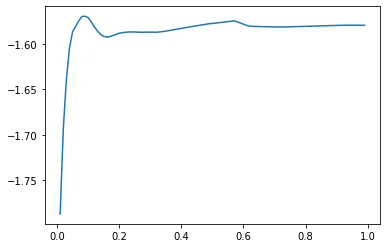

In [0]:
alpha = []
err = []

for i in range(1, 100):
  alpha.append(i/100)
  lmlas = Lasso(alpha = (i/100))
  err.append(np.mean(cross_val_score(lmlas, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10)))

plt.plot(alpha,err)

In [0]:
err = tuple(zip(alpha,err))
df_err = pd.DataFrame(err, columns = ['alpha','err'])
df_err[df_err.err == max(df_err.err)]

,alpha,err
8,0.09,-1.569488


In [0]:
lm_las = Lasso(alpha = 0.09) # alpha defaults to 1
lm_las.fit(X_train,y_train)
np.mean(cross_val_score(lm_las, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10))

-1.5694876958868376

# [Ridge Regression (L2 Regularization)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [0]:
from sklearn.linear_model import Ridge
lm_rid = Ridge()
lm_rid.fit(X_train,y_train)
np.mean(cross_val_score(lm_rid, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10))

-1.8568281200840584

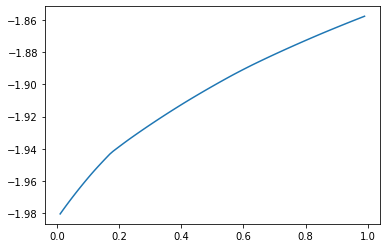

In [0]:
alpha = []
err = []

for i in range(1, 100):
  alpha.append(i/100)
  lmrid = Ridge(alpha = (i/100))
  err.append(np.mean(cross_val_score(lmrid, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10)))

plt.plot(alpha,err)

# [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest#sklearn.ensemble.RandomForestRegressor)

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)

np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv= 10))

-1.6126203758005766

[Tune RF using GridsearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [0]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':range(10,100,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs_rf = GridSearchCV(rf, params ,scoring = 'neg_mean_absolute_error', cv = 10)
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=2,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=No

In [0]:
gs_rf.best_score_

-1.5073523391812864

In [0]:
gs_rf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=90, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

# [XGBoost](https://xgboost.readthedocs.io/en/latest/)

In [0]:
from xgboost import XGBClassifier

# initialize the linear regression model
xgb = XGBClassifier()

# train the model
xgb.fit(X_train, y_train)

np.mean(cross_val_score(xgb ,X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10))

-1.5389473684210528

Tune XGBoost using GridSearchCV

In [0]:
params = {'min_child_weight': [3, 5, ], 'gamma': [0.5, 1], 'subsample': [0.8, 1.0],
          'colsample_bytree': [0.6, 0.8], 'max_depth': [1,2]}

gs_xgb = GridSearchCV(xgb, params ,scoring = 'neg_mean_absolute_error', cv = 10)
gs_xgb.fit(X_train, y_train)

In [0]:
gs_xgb.best_score_

-1.328157894736842

In [0]:
gs_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

# Comparing model performances

In [0]:
lm_pred = lm.predict(X_test)
lm_las_pred = lm_las.predict(X_test)
lm_rid_pred = lm_rid.predict(X_test)
rf_pred = gs_rf.best_estimator_.predict(X_test)
xgb_pred = gs_xgb.best_estimator_.predict(X_test)

In [0]:
print("MLR MAE: ", mean_absolute_error(y_test, lm_pred))
print("Lasso Regression MAE: ", mean_absolute_error(y_test, lm_las_pred))
print("Ridge Regression MAE: ", mean_absolute_error(y_test, lm_rid_pred))
print("Random Forest MAE: ", mean_absolute_error(y_test, rf_pred))
print("XGBoost MAE: ", mean_absolute_error(y_test, xgb_pred))

MLR MAE:  2.1738549277882724
Lasso Regression MAE:  1.659406867680082
Ridge Regression MAE:  1.910866037296869
Random Forest MAE:  1.4261574074074073
XGBoost MAE:  1.2291666666666667
